## Dataset 1
### Lymphoma dataset prediction of survival times

Dataset from: https://trevorhastie.github.io/data.html

In [116]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [141]:
def readData():
    data = pd.read_csv("lymphx.txt",delimiter=' ')
    time = pd.read_csv("lymphtim.txt")
    condition = pd.read_csv("lymphstatus.txt")
    data = np.array(data)[:,1:]
    time = np.array(time)
    condition = np.array(condition)
    return (data,time,condition)

In [142]:
patientData,timeSurvivied, currentCondition = readData()

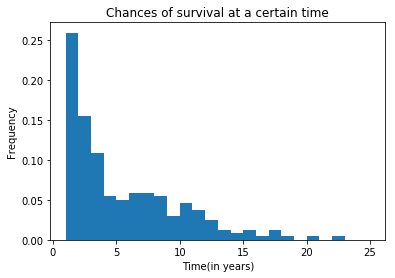

In [143]:
binCenters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
plots = plt.hist(x=timeSurvivied,bins=binCenters,normed=1)
plt.xlabel("Time(in years)");
plt.ylabel("Frequency");
plt.title("Chances of survival at a certain time");

## Explanation
The above graphs shows the probability of survival at a given time T from t in range 0-25 years.

In [144]:
cdftimeSurvived = [plots[0][0]]
for i in range(1,len(plots[0])):
    cdftimeSurvived.append(cdftimeSurvived[i-1] + plots[0][i])
cdftimeSurvived = [1 - x for x in cdftimeSurvived]

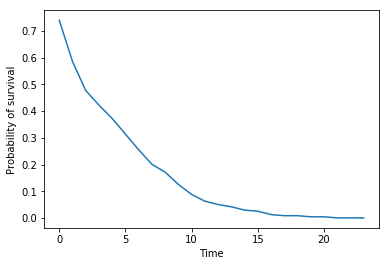

In [145]:
plt.plot(cdftimeSurvived);
plt.xlabel("Time");
plt.ylabel("Probability of survival");

## Explanation
The above graph shows the probability of surivival for t <= T. The value at T=10 determines the probability of survival uptil 10 years. This probabilty is purely using only the time feature and does not include other factors.

In [178]:
X_train, X_test, y_train, y_test = train_test_split(patientData, 
                                                    timeSurvivied, test_size=0.33, random_state=42)

In [13]:
# Building a linear regression model for predicting the survival time
# Using methods from HW4
lambdaLSF = np.logspace(-10,100,1000)
betaMatrix = []
for value in lambdaLSF:
    beta = np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train) + value * np.identity(X_train.shape[1])),np.matmul(X_train.T,y_train))
    betaMatrix.append(beta)
betaMatrix = np.array(betaMatrix)

In [14]:
MSE = []
for counter in range(lambdaLSF.shape[0]):
    MSE.append((1/X_test.shape[0])*sp.linalg.norm(y_test - np.matmul(betaMatrix[counter].T,X_test.T)))
MSE = np.array(MSE)

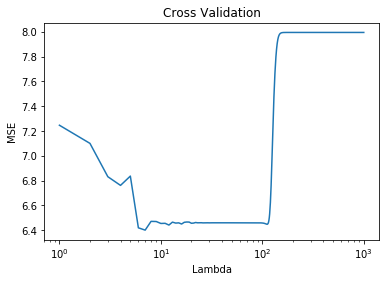

In [35]:
plt.semilogx(MSE);
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("Cross Validation");

In [77]:
lowestMSE = MSE.min()
corr_lambda = MSE.argsort()[0]

In [80]:
print("The lowest Mean Squared Error is {0} at lambda = {1}".format(round(lowestMSE,2),corr_lambda))

The lowest Mean Squared Error is 6.4 at lambda = 7


##### Creating a model using the above lambda value and predicting the outcome

In [221]:
beta = np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train) + 7 * np.identity(X_train.shape[1])),np.matmul(X_train.T,y_train))
modelMSE = (1/X_test.shape[0])*sp.linalg.norm(y_test - np.matmul(beta.T,X_test.T))
y_pred = np.matmul(X_test,beta) - 1

In [223]:
print("The R^2 score for the dataset is {0}".format(abs(r2_score(y_test,y_pred))))

The R^2 score for the dataset is 0.8573498710069174


### Lymphoma dataset explanations and interpretations
This dataset consists of the genome expression of 7399 genes of 240 patients. The dataset's outcome is the length of survivabilty. The dataset was obtained from https://trevorhastie.github.io/data.html. The dataset was split into testing and training using a randomized split to avoid any biased sampling. The model being used is the linear regression model due to the large number of features and having only a small number of patients. The initial graph shows the probability of survival at a given points in time. The second graph shows the probability of survival uptil a certain number of years solely based on the small sample size available.

The Linear Regression model was built using only a slight modification from the code used in Homework 4. The cross vaildation step finds the lowest Mean Squared error and it corresponding lambda value. Using those values a model was calculated and the values were predicted. The MSE of the model was about 6.4 and the R^2 value for the model was about 0.85. Indicating a significant correlation between the predicted line and the outcome with minimum variability as indicated by the R^2 and MSE values correspondingly.

## DATASET 2
### SOUTH AFRICAN HEART DISEASE DATASET

Dataset from: 
https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

In [164]:
def readData2():
    data = pd.read_csv("SAheart.data.txt")
    inputData = np.array(data)[:,1:]
    features = inputData[:,:-1]
    outcomes = inputData[:,-1:]
    position = inputData[:,4] == 'Present'
    inputData[:,4] = position.astype(float)
    return(features,outcomes)

##### Reading the data set and splitting it into training and testing data set

In [167]:
features,outcomes = readData2()
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    outcomes, test_size=0.33, random_state=42)
X_train = np.array(X_train,dtype = float).reshape(X_train.shape[0],X_train.shape[1])
X_test = np.array(X_test,dtype = float).reshape(X_test.shape[0],X_test.shape[1])
y_train = np.array(y_train,dtype = float).reshape(y_train.shape[0],y_train.shape[1])
y_test = np.array(y_test,dtype = float).reshape(y_test.shape[0],y_test.shape[1])

##### Logistic model creation
##### Fitting the model

In [170]:
learning_rate = 5e-7
intercept = np.ones((X_train.shape[0], 1))
X_train = np.hstack((intercept, X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
weight = np.zeros(X_train.shape[1]).reshape(X_train.shape[1],1)
for step in range(550000):
    scores = np.dot(X_train,weight)
    prediction = 1 / (1 + np.exp(-scores))
    error = y_train - prediction
    gradient = np.dot(X_train.T, error)
    weight += learning_rate * gradient

##### Prediction of the test data set

In [172]:
y_pred = []
for data in X_test:
    data = data.reshape(1,data.shape[0])
    num = np.dot(data,weight)
    y_pred.append(np.round(1 / (1 + np.exp(-num[0][0]))))

##### Checking the accuracy of the model

In [174]:
check = 0
for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i]):
        check += 1

In [175]:
print("The accuracy of the Logistic Regression Classifier is: {0}".format(round(check/len(y_pred),2)))

The accuracy of the Logistic Regression Classifier is: 0.76


### South African Heart Disease dataset explanations and conclusions
The dataset consists of data of health conditions of males in a high-risk heart-disease region of Western Cape, South Africa. The aim of the project was to predict the probability of getting a heart disease given the person's health conditions and factors namely: systolic blood pressure, tobacco consumption, ldl levels, etc (All features mentioned here: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt). 

The initial step was to read the data set and split it into a training and testing set. A random sampling was used to produce data with no bias and to create an ideal test set. The dataset was dealt like a classification problem since the outcome was binary, either 0 (bo Heart disease) or 1 (had Heart disease). The calssifier used is a logistic regression classifier, the classifier was chosen since it was impossible to discern any correlation between the features and outcomes since they were binary. The logistic regression was also implemented with the idea that more data could be incorporated without having to change too much of the code while still maintaining the accuracy.The result of logistic regression can also be turned into a probabilistic interpretation of the data to tell us how likely it for someone to contract the disease.

The logistic regression is implemented using the gradient descent to fit the data and to calculate the relative weights of each of the columns. The test data outcomes are then predicted using the weights of the fitted model. The model predicts the outcome with a 76% accuracy.